<a href="https://colab.research.google.com/github/AnukaMithara/Food-Demand-Forecasting-Data-Mining-Project/blob/main/First_Models_Optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EC 9560: DATA MINING**
# **MINI GROUP PROJECT**



### KARUNANAYAKA D.W.A.M.
### 2019/E/054


## Lab 04 progress

### *Optimizing the models with trying different methods*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Link to the colab file: https://colab.research.google.com/drive/1eLFnUu4__-PUrWCZhzyaewMi0bFus6Qk?usp=sharing*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the training data from a CSV file into a DataFrame
train = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/train_GzS76OK/train.csv')

# Read the fulfilment center information from a CSV file into a DataFrame
fulfilment_center_info = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/train_GzS76OK/fulfilment_center_info.csv')

# Read the meal information from a CSV file into a DataFrame
meal_info = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/train_GzS76OK/meal_info.csv')

# Read the testing data from a CSV file into a DataFrame
test = pd.read_csv('/content/drive/MyDrive/EC9560_MiniProject/test_QoiMO9B.csv')

In [ ]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
print('Shape of the train set = ',train.shape)
print('Shape of the fulfilment center information set = ',fulfilment_center_info.shape)
print('Shape of the meal information set = ',meal_info.shape)

Shape of the train set =  (456548, 9)
Shape of the fulfilment center information set =  (77, 5)
Shape of the meal information set =  (51, 3)


In [ ]:
print("Count of Unique center_ids in Train Dataset:", train['center_id'].nunique())
print("Count of Unique meal_ids in Train Dataset:", train['meal_id'].nunique())


Count of Unique center_ids in Train Dataset: 77
Count of Unique meal_ids in Train Dataset: 51


In [ ]:
# Checking Null values

print('Total Null values for the train datset = ',train.isnull().sum().sum())
print('Total Null values for the fulfilment center information datset = ',fulfilment_center_info.isnull().sum().sum())
print('Total Null values for the meal information datset = ',meal_info.isnull().sum().sum())


Total Null values for the train datset =  0
Total Null values for the fulfilment center information datset =  0
Total Null values for the meal information datset =  0


In [ ]:
#Combining datasets

# train = pd.merge(train,fulfilment_center_info, on='center_id')
# test = pd.merge(test,fulfilment_center_info, on='center_id')

# train = pd.merge(train,meal_info, on='meal_id')
# test = pd.merge(test,meal_info, on='meal_id')

In [ ]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
train.isnull().sum().sum()

0

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
train.shape

(456548, 9)

In [ ]:
test.shape

(32573, 8)

In [ ]:
promotions_applied_df = train[train['emailer_for_promotion'] == 1]
meal_count = promotions_applied_df['meal_id'].count()
print('Promotion voucher meals count:', meal_count)


Promotion voucher meals count: 37050


In [ ]:
promotions_applied_df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
14,1378227,1,55,1109,264.84,297.79,1,0,756
20,1044821,1,55,1971,259.99,320.13,1,1,798
24,1338119,1,55,1558,583.03,610.13,1,0,162
25,1188372,1,55,2581,583.03,612.13,1,0,312
26,1440008,1,55,1962,582.03,612.13,1,0,231
...,...,...,...,...,...,...,...,...,...
456434,1411039,145,68,2306,242.53,335.62,1,0,15
456478,1151893,145,51,2306,244.50,337.62,1,0,80
456513,1261448,145,61,1778,150.41,157.14,1,0,271
456514,1071621,145,61,1062,159.08,153.26,1,0,378


In [ ]:
homepage_featured_df = train[train['homepage_featured'] == 1]
meal_count = homepage_featured_df['meal_id'].count()
print('Promotion voucher meals count:', meal_count)


Promotion voucher meals count: 49855


In [ ]:
import pandas as pd
from scipy import stats

# Assuming your DataFrame is named 'train_set'
# Replace the following column names with your actual column names if they are different
columns_to_check = ['checkout_price', 'base_price', 'num_orders']

# Calculate Z-scores for the specified columns
z_scores = stats.zscore(train[columns_to_check])

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Create a boolean mask for outliers
outliers_mask = (abs(z_scores) > threshold).any(axis=1)

# Remove outliers from the DataFrame
train = train[~outliers_mask]

# Display the shape of the original and modified DataFrames
print("Original Shape:", train.shape)
print("Shape after removing outliers:", train.shape)


Original Shape: (448880, 9)
Shape after removing outliers: (448880, 9)


## Split Data

In [ ]:
X=train.drop(["num_orders"],axis=1)
y=train["num_orders"]

### Split the dataset into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

### Feature selection

In [ ]:
x_train

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
74962,1129332,26,132,2704,291.03,292.03,0,0
21395,1192313,8,129,1247,485.03,486.03,0,0
57588,1371985,21,13,1445,618.86,618.86,0,0
66730,1073363,24,89,1247,447.23,447.23,0,0
116255,1481058,40,161,2826,281.36,279.36,0,0
...,...,...,...,...,...,...,...,...
154919,1471490,52,51,2640,280.33,280.33,0,0
446694,1113829,143,55,1971,346.35,345.35,0,0
119889,1486440,41,29,2304,466.63,464.63,0,0
443392,1143531,141,61,1885,121.31,119.31,0,0


### Mutual information as the Feature selection method

In [ ]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(x_train, y_train)

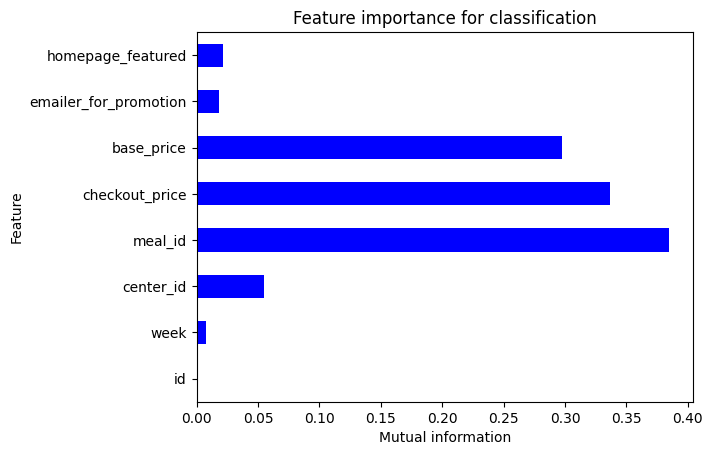

In [ ]:
featureimp = pd.Series(importances)
featureimp.index = x_train.columns
featureimp.plot(kind='barh', color='b')

plt.xlabel("Mutual information")
plt.ylabel("Feature")
plt.title("Feature importance for classification")
plt.show()

### Drop the week and id Attributes that got low MI-Score

In [ ]:
X_New=train.drop(["num_orders",'id'],axis=1)
y_New=train["num_orders"]

In [ ]:
x_train_New, x_test_New, y_train_New, y_test_New= train_test_split(X_New, y_New, test_size= 0.2, random_state=0)

In [ ]:
x_train_New

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
74962,26,132,2704,291.03,292.03,0,0
21395,8,129,1247,485.03,486.03,0,0
57588,21,13,1445,618.86,618.86,0,0
66730,24,89,1247,447.23,447.23,0,0
116255,40,161,2826,281.36,279.36,0,0
...,...,...,...,...,...,...,...
154919,52,51,2640,280.33,280.33,0,0
446694,143,55,1971,346.35,345.35,0,0
119889,41,29,2304,466.63,464.63,0,0
443392,141,61,1885,121.31,119.31,0,0


In [ ]:
x_test_New

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
213079,71,126,2290,264.81,329.83,0,0
8879,4,32,2290,309.43,310.43,0,0
191723,64,41,1993,143.59,144.59,0,0
297693,97,106,1525,241.53,290.03,0,0
229006,76,94,1778,181.42,181.42,0,0
...,...,...,...,...,...,...,...
393814,126,102,2139,290.03,290.03,0,0
243241,80,77,1962,640.23,639.23,0,0
213398,71,106,2492,446.23,447.23,0,0
278067,91,106,1109,302.67,302.67,0,0


## Train the models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import r2_score,mean_squared_log_error
from math import sqrt

#### Linear Regression

In [ ]:
LinearRegressionModel= LinearRegression()
LinearRegressionModel.fit(x_train_New,y_train_New)

Linearreg = LinearRegressionModel.predict(x_test_New)

# Replace negative predictions with 0.1
Linearreg[Linearreg < 0] = 0

# Calculate the RMSLE
linear_rmsle = sqrt(mean_squared_log_error(y_test_New, Linearreg))
print("RMSLE for LinearRegression: ", linear_rmsle)


RMSLE for LinearRegression:  1.2236536444765354


### Decision Tree

In [ ]:
DecisionTreeRegressorModel = DecisionTreeRegressor(random_state=0)
DecisionTreeRegressorModel.fit(x_train_New, y_train_New)

dt_pred = DecisionTreeRegressorModel.predict(x_test_New)

# Calculate the RMSLE
dtr_rmsle = sqrt(mean_squared_log_error(y_test_New, dt_pred))
print("RMSLE for Decision Tree Regression: ", dtr_rmsle)


RMSLE for Decision Tree Regression:  0.6698348419256118


### Random Forest

In [ ]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100, random_state=0)
RandomForestRegressorModel.fit(x_train_New, y_train_New)

rf_pred = RandomForestRegressorModel.predict(x_test_New)

# Calculate the RMSLE
rfr_rmsle = sqrt(mean_squared_log_error(y_test_New, rf_pred))
print("RMSLE for Random Forest Regression: ", rfr_rmsle)


RMSLE for Random Forest Regression:  0.5178218113959185


## Model Testing for Unseen Data

In [ ]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [ ]:
test_New=test.drop(['id'],axis=1)
test_New.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,146,55,1885,158.11,159.11,0,0
1,146,55,1993,160.11,159.11,0,0
2,146,55,2539,157.14,159.14,0,0
3,146,55,2631,162.02,162.02,0,0
4,146,55,1248,163.93,163.93,0,0


In [ ]:
test.shape

(32573, 8)

In [ ]:
test_New.shape

(32573, 7)

### Linear Regression Model

In [ ]:
LinearregPred = LinearRegressionModel.predict(test_New)
LinearregPred[LinearregPred < 0] = 0.1
LinearregPred

array([306.66798304, 306.7618931 , 311.37973926, ..., 222.49243051,
       221.85175836, 245.83827614])

In [ ]:
LinearregPred.shape

(32573,)

In [ ]:
import numpy as np

lrp = {"id": test["id"], "num_orders":np.rint(LinearregPred).astype(int) }
lrpdf = pd.DataFrame(lrp)
lrpdf

,id,num_orders
0,1028232,307
1,1127204,307
2,1212707,311
3,1082698,310
4,1400926,299
...,...,...
32568,1250239,129
32569,1039516,134
32570,1158107,222
32571,1444235,222


In [ ]:
lrpdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/Optimizing/LinearRegression.csv', index = False)

### Decision Tree Model

In [ ]:
DecisionTreeRegressorPred = DecisionTreeRegressorModel.predict(test_New)
DecisionTreeRegressorPred[DecisionTreeRegressorPred < 0] = 0.1
DecisionTreeRegressorPred

array([ 54.,  54., 285., ..., 554., 269., 338.])

In [ ]:
DecisionTreeRegressorPred.shape

(32573,)

In [ ]:
dtr = {"id": test["id"], "num_orders":np.rint(DecisionTreeRegressorPred).astype(int) }
dtrdf = pd.DataFrame(dtr)
dtrdf

,id,num_orders
0,1028232,54
1,1127204,54
2,1212707,285
3,1082698,96
4,1400926,54
...,...,...
32568,1250239,15
32569,1039516,13
32570,1158107,554
32571,1444235,269


In [ ]:
dtrdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/Optimizing/DecisionTreeRegression.csv', index = False)

### Random Forest Regression Model

In [ ]:
RandomForestRegressorPred = RandomForestRegressorModel.predict(test_New)
RandomForestRegressorPred[RandomForestRegressorPred < 0] = 0.1
RandomForestRegressorPred

array([210.92, 136.32, 206.58, ..., 396.08, 374.61, 265.13])

In [ ]:
RandomForestRegressorPred.shape

(32573,)

In [ ]:
rfr= {"id": test["id"], "num_orders":np.rint(RandomForestRegressorPred).astype(int) }
rfrdf = pd.DataFrame(rfr)
rfrdf

,id,num_orders
0,1028232,211
1,1127204,136
2,1212707,207
3,1082698,74
4,1400926,67
...,...,...
32568,1250239,57
32569,1039516,27
32570,1158107,396
32571,1444235,375


In [ ]:
rfrdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/Optimizing/RandomForestRegressor.csv', index = False)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_log_error
from math import sqrt

# Create an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squaredlogerror', colsample_bytree=0.3, learning_rate=0.1,
                              max_depth=5, alpha=10, n_estimators=100)

# Reshape y_train_New and y_test_New to 1D arrays if needed
y_train_New = y_train_New.values.reshape(-1,)
y_test_New = y_test_New.values.reshape(-1,)

# Fit the model
xgb_model.fit(x_train_New, y_train_New)

# Make predictions
xgb_pred = xgb_model.predict(x_test_New)

# Calculate the RMSLE
xgb_rmsle = sqrt(mean_squared_log_error(y_test_New, xgb_pred))
print("RMSLE for XGBoost: ", xgb_rmsle)


RMSLE for XGBoost:  0.9509664576780691


In [ ]:
XgboostPred = xgb_model.predict(test_New)
XgboostPred[XgboostPred < 0] = 0.1
XgboostPred

array([162.63358, 162.63358, 162.15347, ..., 160.7927 , 160.65068,
       145.55347], dtype=float32)

In [ ]:
XgboostPred.shape

(32573,)

In [ ]:
xgb = {"id": test["id"], "num_orders":np.rint(DecisionTreeRegressorPred).astype(int) }
xgbdf = pd.DataFrame(xgb)
xgbdf

,id,num_orders
0,1028232,54
1,1127204,54
2,1212707,285
3,1082698,96
4,1400926,54
...,...,...
32568,1250239,15
32569,1039516,13
32570,1158107,554
32571,1444235,269


In [ ]:
xgbdf.to_csv('/content/drive/MyDrive/EC9560_MiniProject/Optimizing/XGBoost.csv', index = False)

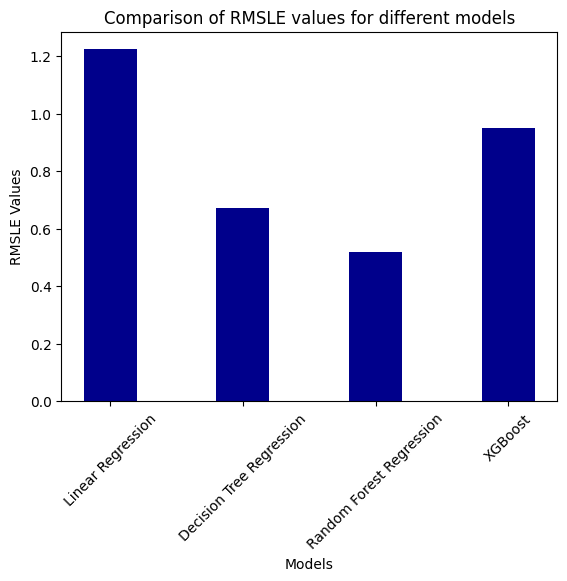

In [ ]:
models = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'XGBoost']

rmsle_values = [linear_rmsle, dtr_rmsle, rfr_rmsle, xgb_rmsle]

plt.bar(models, rmsle_values, color ='darkblue', width = 0.4)

plt.xlabel("Models")
plt.ylabel("RMSLE Values")
plt.title("Comparison of RMSLE values for different models")

plt.xticks(rotation=45)

plt.show()